Дана некоторая функция f(x):

In [1]:
import numpy as np
def f(x):
    return x * np.sin(x * 2 * np.pi) if x < 0 else -x * np.sin(x * np.pi) + np.exp(x / 2) - np.exp(0)

задан X - тысяча точек от -3 до 3:

In [2]:
x = np.linspace(-3, 3, 1000).reshape(-1, 1)

график функции:

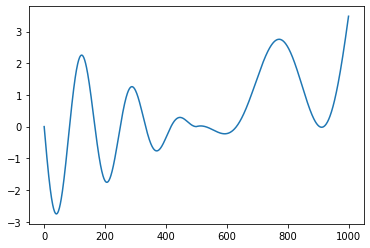

In [3]:
from matplotlib import pyplot as plt
f = np.vectorize(f)
# вычисляем вектор значений функции
y = f(x)
plt.plot(y)

<h2 style="text-align: center;"><b>Задание</b></h2>

1. попробовать обучить однослойную модель нейронных сетей предсказывать значения функции с разными активациями:
 - ReLU
 - Sigmoid
 - Tanh
 
 и параметрами:
 - кол-во нейронов
 - кол-во эпох
 - learning_rate
 
2. визуализировать и сравнить результаты
3. попробовать "разложить" однослойную сеть с активацией tanh и посмотреть ее составляющие, о чем нам говорит разложение?

преобразование данных torch

In [4]:
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
import torch.nn as nn
import torch.optim as optim

batch = 100
dataset = TensorDataset(Tensor(x), Tensor(y))
loader = DataLoader(dataset, batch_size=batch) # default batch size = 1

In [5]:
def train(net, data, optimizer, epochs, loss_fn, device):
    for epoch in range(epochs):
      for x, y in data:
        optimizer.zero_grad()
        y_pred = net(x)
        loss = loss_fn(y_pred, y)

        print(f'Epoch: {epoch}, loss: {loss.data}')

        loss.backward()
        optimizer.step()
      

In [6]:
def predict(net, x):
    x = Tensor(x)
    return net(x)

### пример сети с ReLU

In [ ]:
# model with relu
net_relu = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 25),
    nn.ReLU(),
    nn.Linear(25, 1)
)
print(net_relu)
optimizer = optim.SGD(net_relu.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.MSELoss()
train(net_relu, loader, optimizer=optimizer, epochs=1000, loss_fn=loss_fn, device='cuda')
preds_relu = predict(net_relu, x).data.numpy()

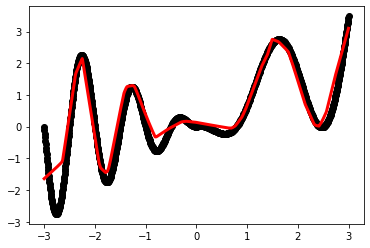

In [8]:
# visualization
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, preds_relu, color='red', linewidth=3, antialiased=True)
plt.show()

### Sigmoid

In [ ]:
# train with sigmoid
net_sigmoid = nn.Sequential(
    nn.Linear(1, 1000),
    nn.Sigmoid(),
    nn.Linear(1000, 1)
)
print(net_sigmoid)
optimizer = optim.SGD(net_sigmoid.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.MSELoss()
train(net_sigmoid, loader, optimizer=optimizer, epochs=1000, loss_fn=loss_fn, device='cuda')
preds_sigmoid = predict(net_sigmoid, x).data.numpy()

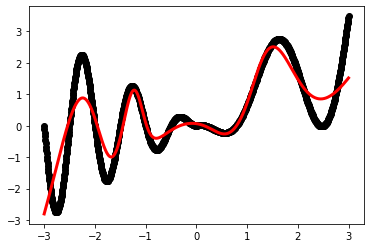

In [10]:
# visualization
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, preds_sigmoid, color='red', linewidth=3, antialiased=True)
plt.show()

### Tanh

In [ ]:
# train with tanh
net_tanh = nn.Sequential(
    nn.Linear(1, 100),
    nn.Tanh(),
    nn.Linear(100, 1)
)
print(net_tanh)
optimizer = optim.SGD(net_tanh.parameters(), lr=0.001, momentum=0.9)
loss_fn = nn.MSELoss()
train(net_tanh, loader, optimizer=optimizer, epochs=5000, loss_fn=loss_fn, device='cuda')
preds_tanh = predict(net_tanh, x).data.numpy()

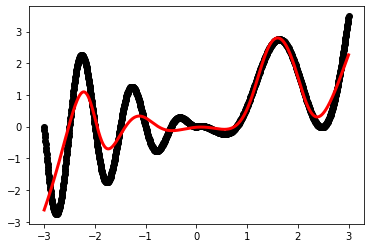

In [16]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, preds_tanh, color='red', linewidth=3, antialiased=True)
plt.show()

### визуализация разложения

In [18]:
# разложение весов
def tanh(x, i):
    w0 = net_tanh[0].weight.data.numpy()
    w1 = net_tanh[2].weight.data.numpy()
    b0 = net_tanh[0].bias.data.numpy()
    b1 = net_tanh[2].bias.data.numpy()

    x_res = np.zeros((1000,1))

    for j in range(i*10, i*10 + 10):

      y_p = w1[0][j] * np.tanh(w0[j] * x + b0[j])
      x_res = x_res + y_p

    y_pred = x_res + b1[0]
    
    return y_pred


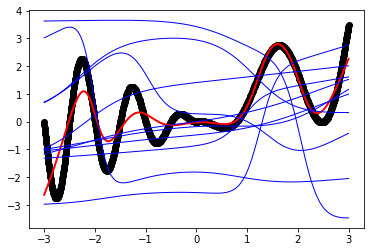

In [19]:
# рисуем функцию и приближение
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, preds_tanh, color='red', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 10, 1):
    plt.plot(x, tanh(x, i), color='blue',
         linewidth=1)
plt.show()

In [20]:
w0 = net_tanh[0].weight.data.numpy()
b0 = net_tanh[0].bias.data.numpy()
w1 = net_tanh[2].weight.data.numpy()
b1 = net_tanh[2].bias.data.numpy()

x_res = np.zeros((1000,1))

for i in range(len(w0)):
    y_p = w1[0][i] * np.tanh(w0[i] * x + b0[i])
    x_res = x_res + y_p

# y_pred = y_p
y_pred = (x_res + b1[0])
# print(y_pred)


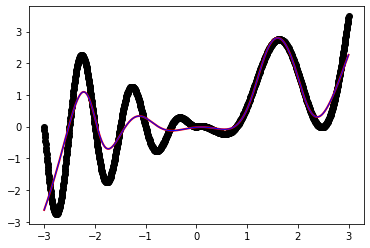

In [21]:
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, preds_tanh, color='red', linewidth=2, antialiased=True)


plt.plot(x, y_pred, color='blue', linewidth=1)
plt.show()

In [ ]:
# попробуйте аналогично разложить net_sigmoid

In [99]:
from numpy.core.fromnumeric import size
import math

def sigmoid(x):
  value = (1 / (1 + np.exp(-x)))
  return value

In [41]:
# разложение весов
def sigmoid_weight(x, i):
    w0 = net_sigmoid[0].weight.data.numpy()
    w1 = net_sigmoid[2].weight.data.numpy()
    b0 = net_sigmoid[0].bias.data.numpy()
    b1 = net_sigmoid[2].bias.data.numpy()

    x_res = np.zeros((1000,1))

    for j in range(i*10, i*10 + 10):

      y_p = w1[0][j] * sigmoid(w0[j] * x + b0[j])
      x_res = x_res + y_p

    y_pred = x_res + b1[0]
    
    return y_pred

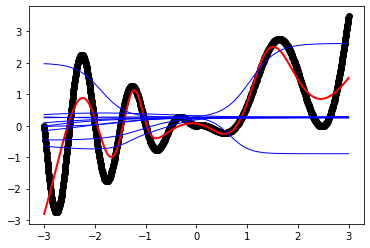

In [102]:
# рисуем функцию и приближение
plt.scatter(x, y, color='black', antialiased=True)
plt.plot(x, preds_sigmoid, color='red', linewidth=2, antialiased=True)

# рисуем разложение
for i in range(0, 10, 1):
    plt.plot(x, sigmoid_weight(x, i), color='blue',linewidth=1)
plt.show()